In [1]:
#we have MNIST logistic regression (handwritten numbers)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
digits  

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
digits['images'].shape

(1797, 8, 8)

In [4]:
np.max(digits.target)

9

In [5]:
digits.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
digits.images[0,0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.])

In [7]:
print("image Data Shape", digits.data.shape) #returns number of 1797 images present (8 by 8 images)
print("Label Data Shape", digits.target.shape) #returns  1797 lables ( from 0-9 integers) 

image Data Shape (1797, 64)
Label Data Shape (1797,)


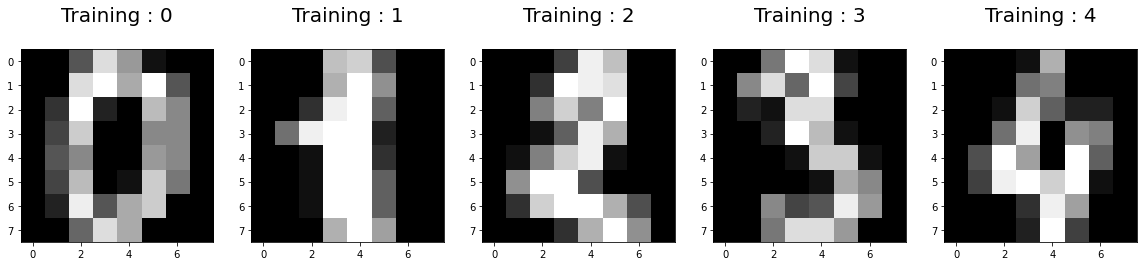

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index +1)#the third index of the subplot. i.e. fig.add_subplot(235) is the same asfig.add_subplot(2, 3, 5)
                                # Note that all integers must be less than 10 for this form to work.
    plt.imshow(np.reshape(image ,(8,8)), cmap = plt.cm.gray)
    plt.title('Training : %i\n' % label,fontsize =20)
    
    #third index of the subplot indicates to whom column in subplot plt should  point to...

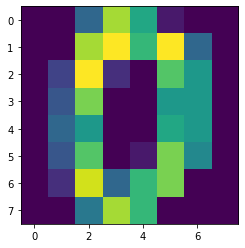

In [9]:
plt.imshow(digits.data[0].reshape(8,8))  #we can also use matshow() instead of imshow()...

In [10]:
(image, label)  #returns last iterated values

(array([ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  8.,
         0.,  0.,  0.,  0.,  0.,  1., 13.,  6.,  2.,  2.,  0.,  0.,  0.,
         7., 15.,  0.,  9.,  8.,  0.,  0.,  5., 16., 10.,  0., 16.,  6.,
         0.,  0.,  4., 15., 16., 13., 16.,  1.,  0.,  0.,  0.,  0.,  3.,
        15., 10.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]),
 4)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23 ,random_state=2)

In [12]:
x_train.shape

(1383, 64)

In [13]:
# to train our data using LogisticRegression
from sklearn.linear_model import LogisticRegression

In [14]:
#trains our data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

c:\users\91939\desktop\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#perdict for one observation (image)
logreg.predict(x_test[0].reshape(1,-1))

array([4])

In [16]:
logreg.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [17]:
prediction = logreg.predict(x_test)

In [18]:
#accuracy check
score = logreg.score(x_test, y_test)*100
score

95.16908212560386

# correct prediction images

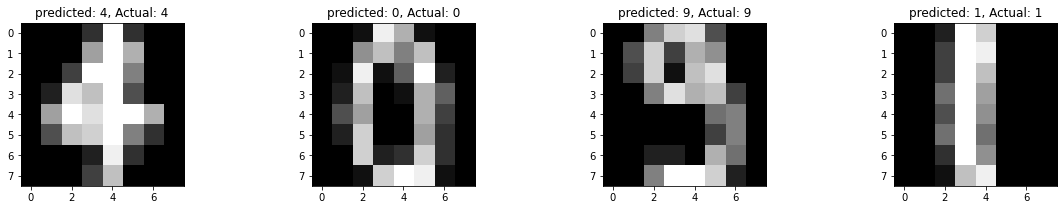

In [19]:
#first four correct predicted images.
index = 0
classifiedindex = []
non_classifiedindex = []
for predict, actual in zip(prediction, y_test):
    if predict == actual:
        classifiedindex.append(index)  #it collects the correct predicted indexes..
    else:
        non_classifiedindex.append(index) 
    index +=1
    
plt.figure(figsize = (20,3))

for plotindex, correct in enumerate(classifiedindex[0:4]):
    plt.subplot(1,4, plotindex+1)
    plt.imshow(np.reshape(x_test[correct], (8,8)), cmap = plt.cm.gray)
    plt.title('predicted: {}, Actual: {}' .format(prediction[correct], y_test[correct], fontsize = 20))

# wrong predicted images

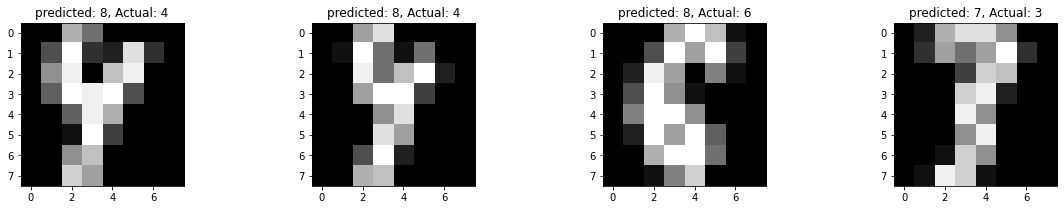

In [20]:
#first four wrong predicted images
plt.figure(figsize = (20,3))

for plotindex, wrong in enumerate(non_classifiedindex[0:4]):
    plt.subplot(1,4, plotindex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title('predicted: {}, Actual: {}' .format(prediction[wrong], y_test[wrong], fontsize = 20))

In [21]:
len(classifiedindex)

394

In [22]:
classifiedindex

[0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 133,
 134,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 1

In [23]:
len(x_test)

414

In [24]:
414-394

20

In [25]:
#hence 20 items unidentified correctly...

In [26]:
y_test

array([4, 0, 9, 1, 4, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 4, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 6, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 1, 8, 8, 9, 8, 5, 4, 4, 7,
       3, 5, 8, 4, 3, 1, 3, 8, 7, 3, 3, 0, 8, 7, 2, 8, 5, 3, 8, 7, 6, 4,
       6, 2, 2, 0, 1, 1, 5, 3, 5, 7, 6, 8, 2, 2, 6, 4, 6, 7, 3, 7, 3, 9,
       4, 7, 0, 3, 5, 8, 5, 0, 3, 9, 2, 7, 3, 2, 0, 8, 1, 9, 2, 1, 9, 1,
       0, 3, 4, 3, 0, 9, 3, 2, 2, 7, 3, 1, 6, 7, 2, 8, 3, 1, 1, 6, 4, 8,
       2, 1, 8, 4, 1, 3, 1, 1, 9, 5, 4, 8, 7, 4, 8, 9, 5, 7, 6, 9, 0, 0,
       4, 0, 0, 4, 0, 6, 5, 8, 8, 3, 7, 9, 2, 0, 3, 2, 7, 3, 0, 2, 1, 5,
       2, 7, 0, 6, 9, 3, 1, 1, 3, 5, 2, 3, 5, 2, 1, 2, 9, 4, 6, 5, 5, 5,
       9, 7, 1, 5, 9, 6, 3, 7, 1, 7, 5, 1, 7, 2, 7, 5, 5, 4, 8, 6, 6, 2,
       8, 7, 3, 7, 8, 0, 9, 5, 7, 4, 3, 4, 1, 0, 3, 3, 5, 4, 1, 3, 1, 2,
       5, 1, 4, 0, 3, 1, 5, 5, 7, 4, 0, 1, 0, 8, 5, 5, 5, 4, 0, 1, 8, 6,
       2, 1, 1, 1, 7, 9, 6, 7, 9, 7, 0, 4, 9, 6, 9,

In [27]:
x_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ..., 15.,  1.,  0.],
       [ 0.,  0.,  8., ..., 13.,  2.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  2., 11., ..., 14.,  2.,  0.],
       [ 0.,  0.,  2., ...,  3.,  0.,  0.]])

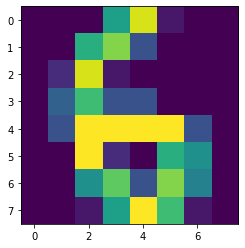

[6]


In [35]:
n = 10
pred = logreg.predict([x_test[n]])  #[] - is given to provide multidimensional array...
                                    
plt.imshow(x_test[n].reshape(8,8))
plt.show()
print(pred)

# data analysing by confusion matrix

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 30]], dtype=int64)

#### visualisation of Confusion Matrix.


Text(69.0, 0.5, 'Truth')

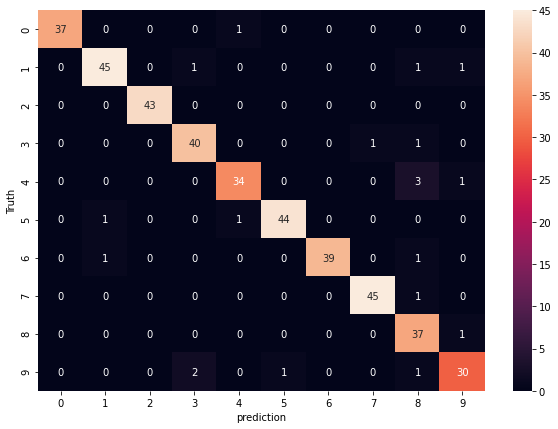

In [41]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.show

in the above table represents is outof 38 times 37 times my model predicted 0 as 0 , 
whereas for 1 time my model predicted 0 as 4 and so on....  